# Проект "Принятие решений в бизнесе на основе данных"

Целью исследования в проекте, является увеличение выручки интернет-магазин, посредством анализа данных о ее размерах за определенные промежуток времени. Также будет проведена проверка и приоритизация гипотез, анализ А/В теста

План работы:
1. [Изучение данных](#start)
2. [Предобработка данных](#1)
3. [Приоритизация гипотез:](#2)
    - [Применение фреймворков ICE. RICE, анализ имзенений в приоритизации;](#3)
4. [Анализ A/B-теста:](#6)
    - [кумулятивные выручка](#7)
    - [кумулятивный средний чек](#8)
    - [относительное изменение кумулятивного среднего чека группы B к группе A.](#8) 
    - [относительное изменение кумулятивной конверсии группы B к группе A](#9) 
    - [точечный график количества заказов по пользователям](#9)
    - [95-й и 99-й перцентили количества заказов на пользователя](#10)
    - [точечный график стоимостей заказов](#11)
    - [95-й и 99-й перцентили стоимости заказов](#12)
    - [Выявление статистической значимости различий в конверсии/среднем чеке между группами по «сырым» данным](#13)
    - [Посчитайте статистическую значимость различий в конверсии/среднем чеке между группами по «очищенным» данным](#15)
    - [результаты теста](#17)

## 1. Изучение общей информации<a id="start"> </a>

In [116]:
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as st 
from IPython.display import display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import pylab as pl
init_notebook_mode(connected=True)

Прочитаем файл hypothesis.csv 

In [117]:
path = 'E:/csv_a_b_test/'


In [118]:
hypothesis_data = pd.read_csv(path + 'hypothesis.csv') # <чтение файла с данными с сохранением их в переменной hypothesis_data>

Посмотрим таблицу hypothesis, выведем ее на экран

In [151]:
hypothesis_data.head()#<вывод таблицы на экран>

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Посмотрим общую информацию о таблице hypothesis

In [120]:
hypothesis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 9 строк и 5 столбцов, пропущенные значения отсутствуют. Необходимо откорректировать названия столбцов, убрать большие буквы. Типы данных указаны верно.


Прочитаем файл orders.csv

In [121]:
path_2 = 'E:/csv_a_b_test/'

In [122]:
orders = pd.read_csv(path_2 + 'orders.csv') # <чтение файла с данными с сохранением их в переменной orders>

Посмотрим таблицу orders, выведем ее на экран

In [152]:
orders.head()#<вывод таблицы на экран>

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Посмотрим общую информацию о таблице orders

In [124]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 1197 строк и 5 столбцов, пропущенные значения отсутствуют. Необходимо откорректировать названия столбцов, убрать большие буквы и изменить тип данных столбца date с object на datetime.

Прочитаем файл visitors.csv 

In [125]:
path_3 = 'E:/csv_a_b_test/'

In [126]:
visitors = pd.read_csv(path_3 + 'visitors.csv') # <чтение файла с данными с сохранением их в переменной visitors>

Посмотрим таблицу visitors, выведем ее на экран

In [153]:
visitors.head()#<вывод таблицы на экран>

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Посмотрим общую информацию о таблице visitors

In [128]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 62 строки и 3 столбца, пропущенные значения отсутствуют. Необходимо изменить тип данных столбца date с object на datetime.

## Вывод

Отсутствие пропущенных значений свидетельствует о полноте данных. Для проведения дальнейшего анализа, необходимо откорректировать названия столбцов, убрав большие буквы в названиях, чтобы привести их к единообразию. Также неверно присвоены типы данных по столбцам содержащим информацию о датах, это тоже нужно исправить в предобработке данных.

## 2. Предобработка данных<a id="1"> </a>

Откорректирум названия столбцов в таблице hypothesis

In [129]:
hypothesis_data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']#<переименование столбцов путем передачи списка новых имен>

Откорректирум названия столбцов в таблице orders

In [130]:
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})#<переименование отдельных столбцов методом rename>

Изменим тип данных столбцов date таблиц orders и visitors с object на datetime методом dt.datetime.strptime(x, '%Y-%m-%d'):

In [131]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))#<изменение типа данных на datetime>
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))#<изменение типа данных на datetime>


## Вывод

Провели предобработку данных, откорректировали названия столбцов, привели их в рабочий вид - убрали большие буквы. Изменили типы данных столбцов содержащих даты с object на datetime.

## 3. Приоритизация гипотез


### 3.1  Фреймворк ICE <a id="2"> </a>

результаты рассчета показателя ICE  укажем в новом столбце, таблицы hypothesis_data

In [132]:
hypothesis_data['ICE'] = (hypothesis_data['impact'] * hypothesis_data['confidence'])/hypothesis_data['efforts'] #<рассчет ICE>

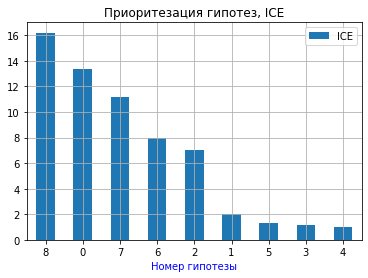

In [133]:
hypothesis_data.reset_index().sort_values(by='ICE', ascending=False).plot(x='index', y='ICE', kind="bar")
plt.xlabel('Номер гипотезы', fontsize=10, color='blue')
plt.title('Приоритезация гипотез, ICE')
plt.grid()
pl.xticks(rotation = 0)
plt.show()


Гипотеза 8 самая перспективная, затем идут гипотезы 0, 7, 6 и 2

### 3.2  Фреймворк RICE <a id="3"> </a>

результаты рассчета показателя RICE  укажем в новом столбце, таблицы hypothesis_data

In [134]:
hypothesis_data['RICE'] = (hypothesis_data['reach']*hypothesis_data['impact'] * hypothesis_data['confidence'])/hypothesis_data['efforts']

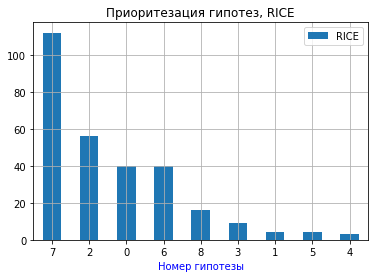

In [135]:
hypothesis_data.reset_index().sort_values(by='RICE', ascending=False).plot(x='index', y='RICE', kind="bar")
plt.xlabel('Номер гипотезы', fontsize=10, color='blue')

plt.title('Приоритезация гипотез, RICE')
pl.xticks(rotation = 0)
plt.grid()


По данному фреймворку самой перспективной гипотезой считается гипотеза под номером 7, а за ней 2, 0, 6 и 8 Гипотезы 0,7 и 6 также были в числе перспективных по фреймворку ICE, а лидер ICE на на пятом месте по оценке RICE. Гипотеза 7 лидирует во фреймворке RICE поскольку ее показатель Reach указывающий на то, сколько пользователей затронет изменение имеет максимальное значение 10, больше чем у остальных гипотез.


## Вывод

Рейтинг по фреймворку ICE 8, 2, 7, 6, 2, по фреймворку RICE 7, 2, 0, 6, 8
При изменение фреймворка, лидер ICE на на пятом месте по оценке RICE. Гипотеза 7 лидирует во фреймворке RICE поскольку ее показатель Reach указывающий на то, сколько пользователей затронет изменение имеет максимальное значение 10, больше чем у остальных гипотез.


## 4. Анализ A/B-теста

### 4.1 Построение графика кумулятивной выручки по группам<a id="4"> </a>

Создадим датафрейм cumulativeData, в котором будут кумулятивные данные, фрейм будет содержать столбцы:
 - date — дата;
 - group — группа A/B-теста (A или B);
 - orders — количество заказов в указанную дату в указанной группе;
 - buyers — количество пользователей, совершивших хотя бы 1 заказ в указанную дату в указанной группе;
 - revenue — выручка в указанную дату в указанной группе (средний чек);
 - visitors — количество посетителей интернет-магазина в указанную дату в определённой группе.

In [136]:
visitors.info()#вывод общей информации о таблице с визитами

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [137]:
datesGroups = orders[['date','group']].drop_duplicates() #массив уникальных пар значений дат и групп теста методом drop_duplicates()

агрегированные кумулятивные о заказах по дням:

In [138]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

аналогично данные о посетителях:

In [139]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 

объединение таблиц кумулятивных заказов и постетителей методом merge:

In [140]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [154]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


Графики кумулятивной выручки по дням и группам A/B-тестирования:

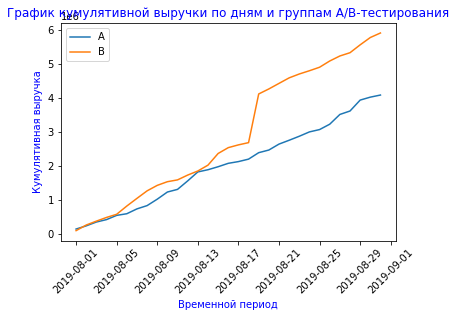

In [142]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]#<датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А>
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']] #<датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B>
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования', fontsize=12, color='blue')
plt.xlabel('Временной период', fontsize=10, color='blue')
plt.ylabel('Кумулятивная выручка', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.legend()
plt.show()

На первый взгляд, отлично, что выручка растет в течение всего теста, но при этом есть резкие изменения в графике выручки по группе в 18.08.2019, возможно был всплеск числа заказов, либо появились очень дорогие заказы в выборке, эти выбросы нужно посмотрить подробнее.

### 4.2 Построение графика кумулятивного среднего чека по группам<a id="5"> </a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

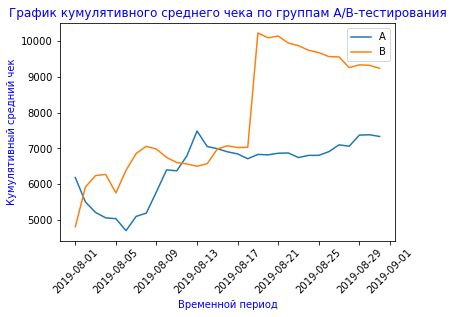

In [143]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам A/B-тестирования', fontsize=12, color='blue')
plt.xlabel('Временной период', fontsize=10, color='blue')
plt.ylabel('Кумулятивный средний чек', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.legend()
plt.show()

Средний чек становится более равномерным ближе к концу теста, при этом для группы B он значительно выше, чем для группы А. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### 4.3 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A<a id="6"> </a>

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline(). Сначала собирем данные в одном датафрейме

In [144]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Затем cтроим отношение средних чеков

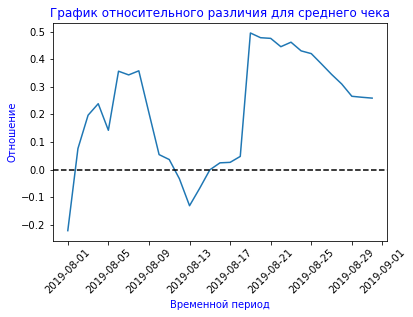

In [145]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного различия для среднего чека', fontsize=12, color='blue')
plt.xlabel('Временной период', fontsize=10, color='blue')
plt.ylabel('Отношение', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.show()


В нескольких точках график различия между сегментами резко «скачет». Где-то есть крупные заказы и выбросы! Найдём их позже.

### 4.4 Построение графика кумулятивной конверсии по группам<a id="7"> </a>

Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0, 0.1]:

Считаем кумулятивную конверсию

In [146]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

отделяем данные по группе A и B и строим графики

In [147]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


Построим графики

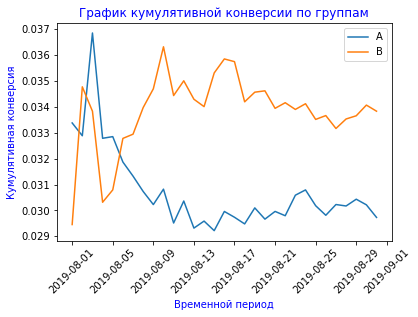

In [160]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам', fontsize=12, color='blue')
plt.xlabel('Временной период', fontsize=10, color='blue')
plt.ylabel('Кумулятивная конверсия', fontsize=10, color='blue')
pl.xticks(rotation = 45)
plt.show()

Группы колебались около одного значения, но затем конверсия группы B вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась

### 4.5 Построение графика относительного изменения кумулятивной конверсии группы B к группе A<a id="8"> </a>

Построим график относительного различия кумулятивных конверсий:

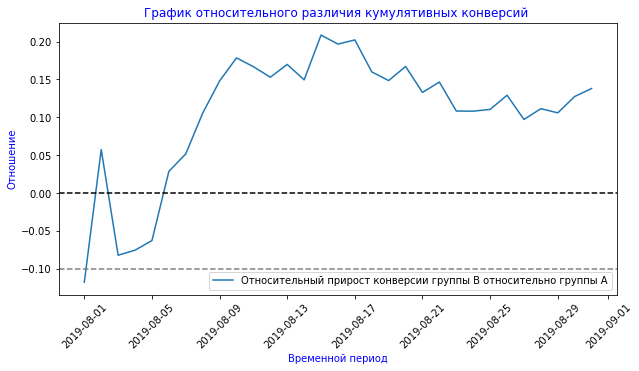

In [163]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного различия кумулятивных конверсий ', fontsize=12, color='blue')
plt.xlabel('Временной период', fontsize=10, color='blue')
plt.ylabel('Отношение', fontsize=10, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
pl.xticks(rotation = 45)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, потом росла до середины теста, а затем незначительные колебания, в целом можно сказать, что оношение конверсии установилось.Необходимо проанализировать аномалии, возможно, они изменят картину.

### 4.6 Построение точечного графика количества заказов по пользователям<a id="9"> </a>

In [ ]:
orders

Посчитаем количество заказов по пользователям:

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
display(ordersByUsers.sort_values(by='orders',ascending=False))

Есть пользователи, которые совершали 5, 8, 9, и 11 заказов. Значительно больше, чем обычный пользователь за неделю.
Построим гистрограмму распределения количества заказов на одного пользователя.

In [ ]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения количества заказов на пользователя', fontsize=12, color='blue')
plt.xlabel('Количество заказов на пользователя', fontsize=10, color='blue')
plt.ylabel('Частота', fontsize=10, color='blue')
plt.grid()
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('Количество заказов на пользователя', fontsize=12, color='blue')
plt.xlabel('Частота', fontsize=10, color='blue')
plt.ylabel('Количество заказов', fontsize=10, color='blue')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.show()

Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.

### 4.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя<a id="10"> </a>

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

Не более 5% пользователей оформляли больше двух заказов. И не более 1% пользователей заказывали более четырех раз.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### 4.8  Построение точечного графика стоимостей заказов<a id="11"> </a>

Построим точечный график

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Количество заказов в зависимости от стоимости заказов', fontsize=12, color='blue')
plt.xlabel('Количество заказов', fontsize=10, color='blue')
plt.ylabel('Стоимость заказов', fontsize=10, color='blue')
plt.grid()
plt.show()

Как и предполагали, есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов, это заказы больше 200 000.

### 4.9  Посчитаем 95-й и 99-й перцентили стоимости заказов <a id="12"> </a>

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

Не более 5% заказов были сделаны на сумму 28 000. И не более 1% заказов на сумму более 58233,2
Разумно выбрать сумму 28 000 как нижнюю границу стоимости заказов, и отсеять аномальные заказы по ней.

### 4.10  Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.  <a id="13"> </a>

Подготовим данные

In [ ]:
orders

In [ ]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head()) 

Посчитаем статистическую значимость различия в конверсии между группами. Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Для того, чтобы использовать критений Манна-Уитни, нам нужно создать переменые sampleA - количество заказов в разрезе пользователей по группе А, sampleB - по группе В. Тем, кто ничего не заказал, будут соответствовать нули. 


 Создадим объект pd.Series нужной длины:

In [ ]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 

Объединим последовательности с помощью функции pd.concat() 

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Сформулируем гипотезы:

Н0 - статистически значимых различий в конверсии между группами нет
Н1 - статистически значимые различия в конверсии между группами есть

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Вывод: По «сырым» данным различия в конверсии групп A и B есть. Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Статистическая значимость достигнута, сегмент В значительно лучше сегмента А.  Относительный выигрыш группы B равен 13,8% — второе число в выводе.

### 4.11  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.  <a id="14"> </a>

Используем критерий Манна Уитни, для расчета статистическую значимости различий в среднем чеке между сегментами и группами


In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.
Напомним, что найденные в пунктах 95-й и 99-й перцентили средних чеков равны 28 000 и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

### 4.12  Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.  <a id="15"> </a>

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. 

In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))
display(abnormalUsers.shape) 

Всего 74 аномальных пользователей. Необходимо понять их вляние на результат, для этого будем считать критерии очищенным данным

In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

критерий Манна-Уитни:

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

По «очищенным» данным есть различия в конверсии групп A и B, в сравнении с результата теста по «сырым» данным по конверскии практически такие же. Необходимо посмотреть, произошло ли что-нибудь с результатами по среднему чеку.



### 4.13  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.  <a id="16"> </a>

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

P-value практически не изменился, а разница между сегментами  изменилась сильно она была 25,9 процентов в пользу группы B, а стала 2% в пользу А. т.е. после того как мы убрали аномальные значения средний чек группы А стал даже больше среднего чека группы В.


# Вывод  <a id="17"> </a>

Имеющиеся факты:
 - Есть статистически значимые различия по конверсии между группами и «сырым», и по данным после фильтрации аномалий, статистическая значимость достигнута;
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - График различия конверсии между группами сообщает, что результаты группы B лучше группы A и есть значительная тенденции к улучшению
 - График различия среднего чека говорит о том, что результаты группы B ухудшаются но все же сейчас на 25% лучше:

Исходя из обнаруженных фактов, тест следует признать его успешным. Тест следует, остановить и зафиксировать победу группы В.
